In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'data\sales.csv')

In [3]:
df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [5]:
df.describe(include = 'object')

,Brands,Models,Colors,Memory,Storage,Camera,Mobile
count,3114,3114,3114,3071,3075,3114,3114
unique,17,914,639,26,26,1,928
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB,Yes,Apple iPhone 11
freq,719,36,489,750,774,3114,36


In [6]:
df.duplicated().sum()

108

In [7]:
df.isna().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df = df.dropna()

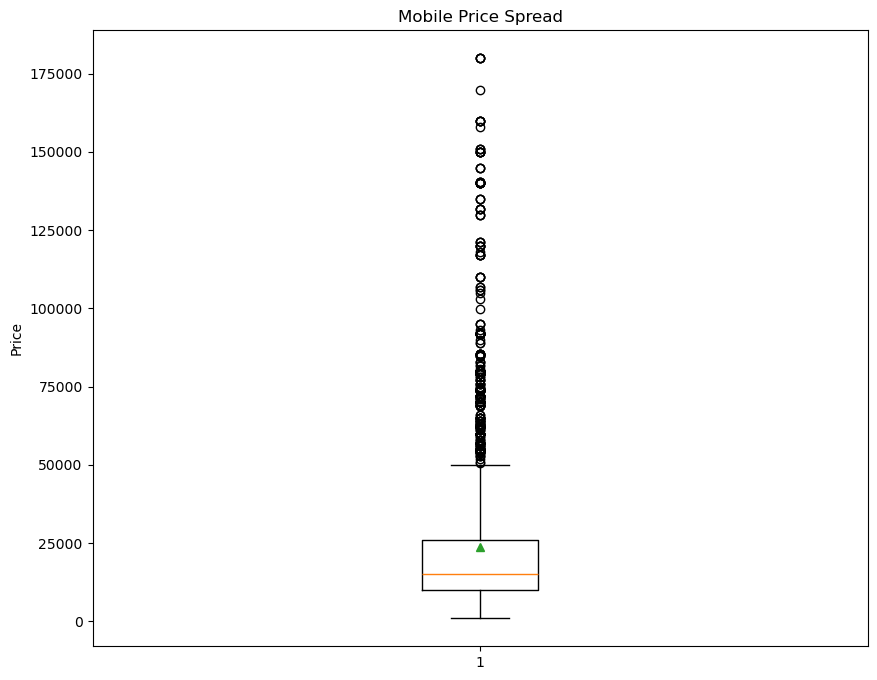

In [10]:
plt.figure(figsize=(10, 8))
plt.title('Mobile Price Spread')

plt.boxplot(df['Selling Price'], showmeans = True)

plt.ylabel('Price')
plt.xlabel('')
plt.show()

In [11]:
def toMB(value):
    try :
        if 'MB' in value:
            return int(float(value.replace('MB', '').strip()))
        elif 'GB' in value:
            return int(float(value.replace('GB', '').strip()) * 1024)
        elif 'TB' in value:
            return int(float(value.replace('TB', '').strip()) * 1024 * 1024)
    except:
        #print(value)
        return value
    
def conversiontoMB(data):
    data_converted = data.copy()
    data_converted['Memory'] = data['Memory'].dropna().apply(toMB)
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 32 GB", "32 GB")
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 16 GB", "16 GB")
    data_converted['Storage'] = data_converted['Storage'].dropna().apply(toMB)
    return data_converted
df = conversiontoMB(df)

In [12]:
df['Memory'].value_counts()

Memory
4096     802
3072     458
6144     440
2048     359
8192     322
1024     191
12288     55
512       46
4         37
1536      29
64        14
32        14
16        12
8          9
768        6
10         3
2          2
46         2
128        1
153        1
30         1
100        1
16384      1
Name: count, dtype: int64

In [13]:
df['Storage'].value_counts()

Storage
65536      734
131072     698
32768      539
16384      317
262144     195
8192       133
4096        56
524288      36
4           27
2           26
128         11
16           9
1048576      6
64           3
132096       3
512          2
256          2
133120       2
8            2
100          2
153          1
10           1
140          1
Name: count, dtype: int64

In [14]:
df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8192,131072,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2048,16384,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4096,65536,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4096,65536,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8,16,Yes,4.0,2199,2199,GIONEE L800,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3104,LG,Q Stylus,Black,3072,32768,Yes,3.8,20000,20000,LG Q Stylus,0,0.000000
3107,SAMSUNG,Galaxy S Duos 2,Black,512,4096,Yes,4.0,5999,5999,SAMSUNG Galaxy S Duos 2,0,0.000000
3108,SAMSUNG,Metro 313,Black,4,2,Yes,4.2,2299,2299,SAMSUNG Metro 313,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,6144,131072,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750


In [15]:
df_encoded = df.drop(columns = ['Original Price'])

In [16]:
df_encoded

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8192,131072,Yes,4.3,19330,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2048,16384,Yes,3.8,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4096,65536,Yes,4.2,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4096,65536,Yes,4.6,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8,16,Yes,4.0,2199,GIONEE L800,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3104,LG,Q Stylus,Black,3072,32768,Yes,3.8,20000,LG Q Stylus,0,0.000000
3107,SAMSUNG,Galaxy S Duos 2,Black,512,4096,Yes,4.0,5999,SAMSUNG Galaxy S Duos 2,0,0.000000
3108,SAMSUNG,Metro 313,Black,4,2,Yes,4.2,2299,SAMSUNG Metro 313,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,6144,131072,Yes,4.4,16999,POCO M4 Pro 5G,3000,15.000750


In [17]:
ori = OrdinalEncoder()
df_encoded['Camera'] = ori.fit_transform(df_encoded[['Camera']]).astype(int)

In [18]:
ori = OrdinalEncoder()
df_encoded['Brands'] = ori.fit_transform(df_encoded[['Brands']]).astype(int)

In [19]:
ori = OrdinalEncoder()
df_encoded['Models'] = ori.fit_transform(df_encoded[['Models']]).astype(int)

In [20]:
ori = OrdinalEncoder()
df_encoded['Mobile'] = ori.fit_transform(df_encoded[['Mobile']]).astype(int)

In [21]:
ori = OrdinalEncoder()
df_encoded['Colors'] = ori.fit_transform(df_encoded[['Colors']]).astype(int)

In [22]:
df_encoded

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Mobile,Discount,discount percentage
0,13,274,349,8192,131072,0,4.3,19330,529,1669,7.947998
1,10,44,546,2048,16384,0,3.8,10199,398,0,0.000000
3,6,560,266,4096,65536,0,4.2,12999,174,0,0.000000
4,1,854,45,4096,65536,0,4.6,49900,29,0,0.000000
5,2,484,45,8,16,0,4.0,2199,75,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3104,7,595,45,3072,32768,0,3.8,20000,224,0,0.000000
3107,13,403,45,512,4096,0,4.0,5999,655,0,0.000000
3108,13,520,45,4,2,0,4.2,2299,704,0,0.000000
3109,12,504,128,6144,131072,0,4.4,16999,523,3000,15.000750


In [23]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['Selling Price'])
y = df_encoded['Selling Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


In [24]:
X_train

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Mobile,Discount,discount percentage
569,8,578,243,4096,32768,0,4.3,291,0,0.000000
1121,10,28,111,3072,65536,0,4.0,384,1100,9.566049
625,13,490,66,1024,16384,0,3.9,695,0,0.000000
2705,14,530,281,8192,131072,0,4.2,732,2000,7.692604
371,13,301,41,6144,131072,0,4.3,553,3000,9.836388
...,...,...,...,...,...,...,...,...,...,...
1182,7,473,85,2048,16384,0,4.0,211,0,0.000000
1938,1,858,457,4096,131072,0,4.5,33,2901,4.469954
1904,10,25,259,1024,8192,0,4.0,381,0,0.000000
1314,8,470,502,4096,32768,0,4.0,283,0,0.000000


In [25]:
X_test

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Mobile,Discount,discount percentage
1745,16,787,394,8192,131072,0,4.3,860,100,0.714796
2449,15,64,126,6144,131072,0,4.4,779,1000,5.882699
956,4,187,530,2048,16384,0,3.8,138,0,0.000000
2777,8,731,257,4096,32768,0,4.1,303,0,0.000000
2639,14,608,375,4096,65536,0,4.5,741,1200,12.001200
...,...,...,...,...,...,...,...,...,...,...
398,6,445,364,4096,65536,0,4.3,154,1700,15.455951
633,6,454,463,4096,65536,0,4.4,163,0,0.000000
2182,13,319,166,2048,32768,0,3.6,571,0,0.000000
425,12,208,547,8192,262144,0,4.5,515,0,0.000000


In [26]:
y_train

569     17999
1121    10399
625      4999
2705    23999
371     27499
        ...  
1182     9990
1938    61999
1904     7739
1314     7599
697      8499
Name: Selling Price, Length: 2244, dtype: int64

In [27]:
y_test

1745     13890
2449     15999
956      12570
2777     12499
2639      8799
         ...  
398       9299
633      11999
2182     19999
425      30999
391     119900
Name: Selling Price, Length: 562, dtype: int64

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 197862704.6218138
R-squared: 0.6637452753248871


In [29]:
rs=pd.DataFrame({'Test':y_test.values,'Pred':y_pred})
rs

,Test,Pred
0,13890,25062.419370
1,15999,25851.088540
2,12570,14539.136094
3,12499,14214.786737
4,8799,17821.999884
...,...,...
557,9299,19008.204520
558,11999,27084.080646
559,19999,-816.684811
560,30999,51805.441178


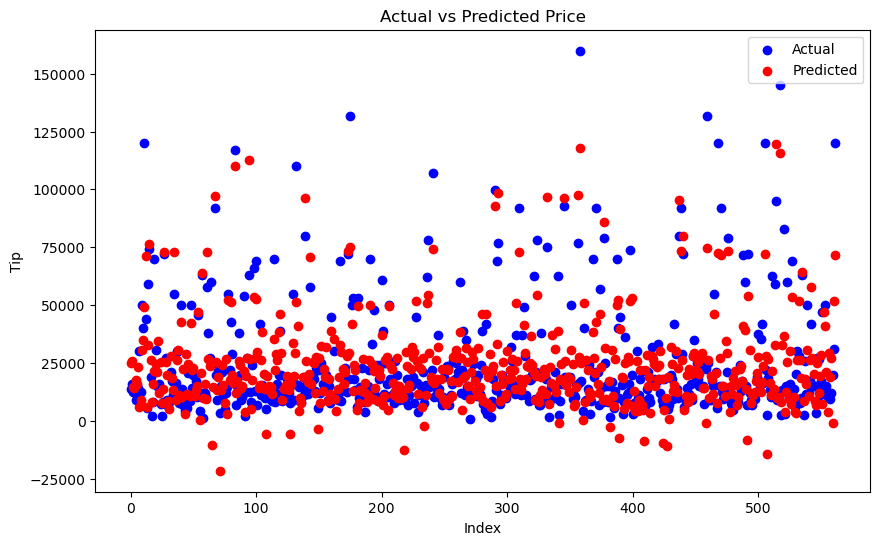

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(rs.index, rs['Test'], color='blue', label='Actual')
plt.scatter(rs.index, rs['Pred'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Tip')
plt.legend()
plt.title('Actual vs Predicted Price')
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("K-Nearest Neighbors Regression:")
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

K-Nearest Neighbors Regression:
Mean Squared Error (MSE): 145171673.54177934
R-squared: 0.7532902362235541


In [32]:
rs=pd.DataFrame({'Test':y_test.values,'Pred':y_pred})
rs

,Test,Pred
0,13890,27797.2
1,15999,18395.4
2,12570,19259.6
3,12499,13327.4
4,8799,11639.0
...,...,...
557,9299,9719.0
558,11999,11799.0
559,19999,19237.8
560,30999,44395.4


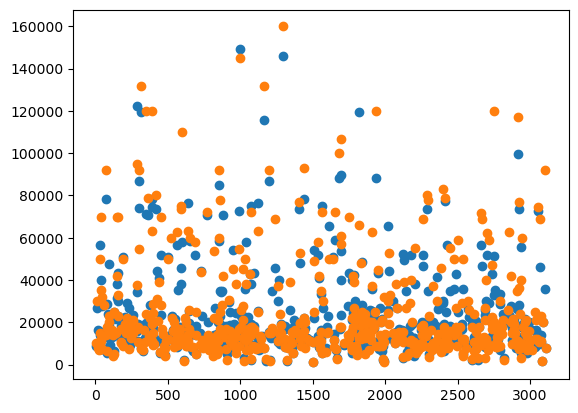

In [33]:
plt.scatter(y_test.index,y_pred)
plt.scatter(y_test.index,y_test)
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Random Forest Regression:")
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Random Forest Regression:
Mean Squared Error (MSE): 43833037.50597751
R-squared: 0.9255086197956408


In [70]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=3)
ada = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)

print(f'AdaBoost Root Mean Squared Error: {rmse_ada}')
print(f'AdaBoost Standard deviation of the target variable: {np.std(y_test)}')
print(f'AdaBoost R^2 Score: {r2_ada}')

AdaBoost Root Mean Squared Error: 18538.76645752447
AdaBoost Standard deviation of the target variable: 24257.596792769913
AdaBoost R^2 Score: 0.41592835777739723
